# A visualization demonstrating impact of Lockdown length on COVID infection rate and death

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.signal import savgol_filter

### Read COVID cases and death dataset, filter and subset as well

In [2]:
covid_data=pd.read_excel('../visualisation proj/data/COVID-19-geographic-disbtribution-worldwide.xlsx')
covid_data = covid_data[['countryterritoryCode','country', 'date', 'cases', 'deaths']]
covid_data.date=pd.to_datetime(covid_data.date, format='%Y-%m-%d', errors='coerce')


In [3]:
covid_data.date.max()

Timestamp('2020-12-14 00:00:00')

In [4]:
covid_data.head(5)

,countryterritoryCode,country,date,cases,deaths
0,AFG,Afghanistan,2020-12-14,746,6
1,AFG,Afghanistan,2020-12-13,298,9
2,AFG,Afghanistan,2020-12-12,113,11
3,AFG,Afghanistan,2020-12-11,63,10
4,AFG,Afghanistan,2020-12-10,202,16


### Read COVID natinal lockdown data

dataset is collected from https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_lockdowns
        and saved to an exel file.
        
   

In [5]:
ds=pd.read_excel('../visualisation proj/data/national - first-lockdown-world.xlsx')

In [6]:
ds.head(5)

,Country,start,end,Length_days,Level,population
0,Mongolia,2020-03-10,2020-03-16,6,National,3278292
1,Hungary,2020-03-28,2020-04-10,13,National,9660350
2,Lebanon,2020-03-15,2020-03-28,13,National,6825442
3,Samoa,2020-03-26,2020-04-08,13,National,198410
4,Papua New Guinea,2020-03-24,2020-04-07,14,National,8947027


### Select countries which is common in covid dataset and first lockdown dataset .

In [7]:
covid_data= covid_data[covid_data['country'].isin(ds.Country)]

In [8]:
len(covid_data.country.value_counts())

60

In [9]:
len(ds.Country.value_counts())

72

limit lock-down data with countries in covid dataset

In [10]:
ds=ds[ds['Country'].isin(covid_data.country)]

In [11]:
len(ds.Country.value_counts())

60

### filling missing values

In [12]:
for country in ds.Country:
        covid_data.loc[(covid_data['country']==country),:].cases.fillna(method='bfill',inplace=True)
        covid_data.loc[(covid_data['country']==country),:].deaths.fillna(method='bfill',inplace=True)

C:\Users\zst2019\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Detecting outlayers and filling with new value

In [13]:
for country in ds.Country:
    dataframe=covid_data.loc[(covid_data['country']==country),:]
    covid_data.loc[(covid_data['country']==country),'expected_cases']=(dataframe['cases'].shift(1)+dataframe['cases'].shift(-1))/2
   

In [14]:
for country in ds.Country:
    country=covid_data.loc[covid_data['country']==country,:]
    isoutlier=np.abs((country.loc[:,'expected_cases']-country.loc[:,'cases'])/country.loc[:,'expected_cases'])>0.8
    country.loc[isoutlier,'cases']=country.loc[isoutlier,'expected_cases']

C:\Users\zst2019\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### select five countries for first exploring

In [15]:
df_ir=covid_data.loc[covid_data['country']=="Iran",:]
df_france=covid_data.loc[covid_data['country']=="France",:]
df_italy=covid_data.loc[covid_data['country']=="Italy",:]
df_spain=covid_data.loc[covid_data['country']=="Spain",:]
df_germany=covid_data.loc[covid_data['country']=="Germany",:]
selected=[df_ir,df_france,df_italy,df_spain,df_germany]

find the minimum start of lockdown and maximum end of lockdown date

In [16]:
start_date=min(ds[ds['Country'].isin(["Iran","France","Italy","Germany","Spain"])]['start'])
end_date=max(ds[ds['Country'].isin(["Iran","France","Italy","Germany","Spain"])]['end'])

In [17]:
start_date

Timestamp('2020-03-09 00:00:00')

In [18]:
end_date

Timestamp('2020-05-18 00:00:00')

limit covid data from 10 days befor start date_to 21 days after end_date

In [19]:
fr_df=df_france.loc[(df_france['date']>start_date + datetime.timedelta(days=-10)) & (df_france['date'] < end_date +  datetime.timedelta(days=21))]
it_df=df_italy.loc[(df_italy['date']>start_date+ datetime.timedelta(days=-10)) & (df_italy['date'] < end_date+  datetime.timedelta(days=21))]
gr_df=df_germany.loc[(df_germany['date']>start_date+ datetime.timedelta(days=-10)) & (df_germany['date'] < end_date+  datetime.timedelta(days=21))]
sp_df=df_spain.loc[(df_spain['date']>start_date+ datetime.timedelta(days=-10)) & (df_spain['date'] < end_date+  datetime.timedelta(days=21))]
ir_df=df_ir.loc[(df_ir['date']>start_date+ datetime.timedelta(days=-10)) & (df_ir['date'] < end_date+  datetime.timedelta(days=21))]
countries=[fr_df,it_df,gr_df,sp_df,ir_df]

smooth our data for better visualization 

In [61]:
from scipy.signal import savgol_filter
for country in countries:
    country.cases=savgol_filter(country.cases,51, 2)
    country.deaths=savgol_filter(country.deaths,51, 2)

C:\Users\zst2019\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


find the start and end date of lockdown for selected country to highligth lockdown period

In [21]:
start_fr=ds.loc[ds['Country']=='France',:].start.iloc[0]
end_fr=ds.loc[ds['Country']=='France',:].end.iloc[0]
start_gr=ds.loc[ds['Country']=='Germany',:].start.iloc[0]
end_gr=ds.loc[ds['Country']=='Germany',:].end.iloc[0]
start_it=ds.loc[ds['Country']=='Italy',:].start.iloc[0]
end_it=ds.loc[ds['Country']=='Italy',:].end.iloc[0]
start_sp=ds.loc[ds['Country']=='Spain',:].start.iloc[0]
end_sp=ds.loc[ds['Country']=='Spain',:].end.iloc[0]
start_ir=ds.loc[ds['Country']=='Iran',:].start.iloc[0]
end_ir=ds.loc[ds['Country']=='Iran',:].end.iloc[0]

import visualization library

In [22]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.plotting import figure, show, ColumnDataSource, output_file
from bokeh.models import Grid, LinearAxis, Plot, Range1d, DatetimeAxis

In [23]:
output_notebook()

Loading BokehJS ...

In [62]:
from bokeh.models import Legend
fig=figure(x_axis_type='datetime',title='Numbers of Covid-19 cases over time - The lockdown period is highlighted',plot_height=400, plot_width=900,y_range=(0,7000))
fig.yaxis.axis_label = 'number of cases'
fig.xaxis.axis_label = 'date'
fig.line(fr_df.date ,fr_df.cases,color = "red",alpha=0.8, line_dash='dashed')
r0=fig.line(fr_df.loc[(fr_df['date']>=start_fr) & (fr_df['date']<=end_fr),:].date ,fr_df.loc[(fr_df['date']>=start_fr) & (fr_df['date']<=end_fr),:].cases, color = "red",alpha=1)

fig.line(it_df.date ,it_df.cases,color = "blue",alpha=0.8, line_dash='dashed')
r1=fig.line(it_df.loc[(it_df['date']>=start_it) & (it_df['date']<=end_it),:].date ,it_df.loc[(it_df['date']>=start_it) & (it_df['date']<=end_it),:].cases, color = "blue",alpha=1)

fig.line(gr_df.date ,gr_df.cases,color = "green",alpha=0.8, line_dash='dashed')
r2 =fig.line(gr_df.loc[(gr_df['date']>=start_gr) & (gr_df['date']<=end_gr),:].date ,gr_df.loc[(gr_df['date']>=start_gr) & (gr_df['date']<=end_gr),:].cases, color = "green",alpha=1)

fig.line(sp_df.date ,sp_df.cases,color = "black",alpha=0.8, line_dash='dashed')
r3 =fig.line(sp_df.loc[(sp_df['date']>=start_sp) & (sp_df['date']<=end_sp),:].date ,sp_df.loc[(sp_df['date']>=start_sp) & (sp_df['date']<=end_sp),:].cases, color = "black",alpha=1)

fig.line(ir_df.date ,ir_df.cases,color = "orange",alpha=0.8, line_dash='dashed')
r4 =fig.line(ir_df.loc[(ir_df['date']>=start_ir) & (ir_df['date']<=end_ir),:].date ,ir_df.loc[(ir_df['date']>=start_ir) & (ir_df['date']<=end_ir),:].cases, color = "orange",alpha=1)
legend1 = Legend(items=[("Spain" , [r3]),("Italy" , [r1]),("Germany" , [r2]),("France" , [r0]),("Iran" , [r4])],
                 location=(-98,195))
fig.add_layout(legend1, 'right' )                 
show(fig)

In [63]:

fig=figure(x_axis_type='datetime',title='Number of Covid-19 deaths over time - The lockdown period is highlighted',plot_height=400, plot_width=900,y_range=(0, 800))
fig.yaxis.axis_label = 'number of deaths'
fig.xaxis.axis_label = 'date'
fig.line(fr_df.date ,fr_df.deaths,color = "red", line_dash='dashed')
r0=fig.line(fr_df.loc[(fr_df['date']>=start_fr) & (fr_df['date']<=end_fr),:].date ,fr_df.loc[(fr_df['date']>=start_fr) & (fr_df['date']<=end_fr),:].deaths, color = "red",alpha=1)

fig.line(it_df.date ,it_df.deaths,color = "blue", line_dash='dashed')
r1=fig.line(it_df.loc[(it_df['date']>=start_it) & (it_df['date']<=end_it),:].date ,it_df.loc[(it_df['date']>=start_it) & (it_df['date']<=end_it),:].deaths, color = "blue",alpha=1)

fig.line(gr_df.date ,gr_df.deaths,color = "green", line_dash='dashed')
r2=fig.line(gr_df.loc[(gr_df['date']>=start_gr) & (gr_df['date']<=end_gr),:].date ,gr_df.loc[(gr_df['date']>=start_gr) & (gr_df['date']<=end_gr),:].deaths, color = "green",alpha=1)

fig.line(sp_df.date ,sp_df.deaths,color = "black", line_dash='dashed')
r3=fig.line(sp_df.loc[(sp_df['date']>=start_sp) & (sp_df['date']<=end_sp),:].date ,sp_df.loc[(sp_df['date']>=start_sp) & (sp_df['date']<=end_sp),:].deaths, color = "black",alpha=1)

fig.line(ir_df.date ,ir_df.deaths,color = "orange", line_dash='dashed')
r4=fig.line(ir_df.loc[(ir_df['date']>=start_ir) & (ir_df['date']<=end_ir),:].date ,ir_df.loc[(ir_df['date']>=start_ir) & (ir_df['date']<=end_ir),:].deaths, color = "orange",alpha=1)

legend1 = Legend(items=[("France" , [r0]),("Spain" , [r3]),("Italy" , [r1]),("Germany" , [r2]),("Iran" , [r4])],
                 location=(-98,195))
fig.add_layout(legend1, 'right' ) 
show(fig)

### What is the best lockdown length?

In [27]:
import numpy as np
import scipy.special

from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, show


def make_plot(title, hist):
    p = figure(title=title, tools='', background_fill_color="#fafafa")
    p.quad(top=hist, bottom=0, left=edges[:], right=edges[1:],
           fill_color="navy")
#     p.line(x, pdf, line_color="#ff8888", line_width=4, alpha=0.7, legend_label="PDF")
#     p.line(x, cdf, line_color="orange", line_width=2, alpha=0.7, legend_label="CDF")

    p.y_range.start = 0
    p.x_range.start = 0
    p.legend.location = "center_right"
    p.legend.background_fill_color = "#fefefe"
    p.xaxis.axis_label = 'x'
    p.yaxis.axis_label = 'y'
    p.grid.grid_line_color="white"
    return p

# Normal Distribution



measured = ds.groupby(by=['Length_days']).count().index,ds.groupby(by=['Length_days']).count().Country
hist, edges = np.histogram(measured, bins=6)



p1 = make_plot("title", hist)
show(gridplot([p1], ncols=2, plot_width=800, plot_height=400, toolbar_location=None))

C:\Users\zst2019\anaconda3\lib\site-packages\bokeh\models\plots.py:764: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
C:\Users\zst2019\anaconda3\lib\site-packages\bokeh\models\plots.py:764: UserWarning: 
You are attempting to set `plot.legend.background_fill_color` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


As best lockdown period is suggested 50 days in this article:https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0243413
        we categorize the lockdown dataset based on lockdown Length(days) in 6 groups with a distace of 25 days to increase accuracy 

In [28]:
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure,output_file, show
output_file("line.html")

lockdown_length= ['0 to 25 ', '25 to 50 ', '50 to 75 ', '75 to 100 ','100 to 125 ','125 to 150 ']
counts =[ds.loc[(ds['Length_days']>0) & (ds['Length_days']<=25),'Country' ].count(), ds.loc[(ds['Length_days']>25) & (ds['Length_days']<=50),'Country' ].count(), ds.loc[(ds['Length_days']>50) & (ds['Length_days']<=75),'Country' ].count(), ds.loc[(ds['Length_days']>75) & (ds['Length_days']<=100),'Country' ].count(), ds.loc[(ds['Length_days']>100) & (ds['Length_days']<=125),'Country' ].count(), ds.loc[(ds['Length_days']>125) & (ds['Length_days']<=150),'Country' ].count()]

source = ColumnDataSource(data=dict(lockdown_length=lockdown_length, counts=counts, color=Spectral6))

fig = figure(x_range=lockdown_length ,plot_height=350, plot_width=700,y_range=(0, 30), title="Number of countries based on lockdown length")

fig.vbar(x='lockdown_length', top='counts', width=0.8, color='gray', source=source)


fig.yaxis.axis_label = 'count of countries'
fig.xaxis.axis_label = 'lockdown length (days)'
show(fig)

as it's shown in the bar chart, majority of countries apply 25 to 50 days lockdown.

### How can we measure their effectiveness?

assume the limited part of the date which the first country started its lockdown and the last country ended. This period has no overlap with the second lockdown.

In [29]:
min_start=min(ds.start)
max_end=max(ds.end)

In [30]:
min_start

Timestamp('2020-03-09 00:00:00')

In [31]:
max_end

Timestamp('2020-09-01 00:00:00')

In [32]:
df_sum=covid_data.loc[(covid_data['date']>=min_start) & (covid_data['date']<=max_end)].groupby(by=['country']).sum().reset_index()

calculate the ratio of the total number of cases to the population of each country during this period.


In [33]:
sumCases=dict()
for country in ds.Country:
    if (len(df_sum.loc[(df_sum['country']==country)].cases.values)!=0):
            sumCases[country]=df_sum.loc[(df_sum['country']==country)].cases.values[0]

In [34]:
for country in sumCases.keys():
    ds.loc[(ds['Country']==country),'sum_cases']=(sumCases[country])

calculate an average ratio of the total number of cases to the population of countries  by grouping on lockdown length

In [35]:
sum_cases0_25=(((ds.loc[(ds['Length_days']>0) & (ds['Length_days']<=25),: ].sum_cases)/(ds.loc[(ds['Length_days']>0) & (ds['Length_days']<=25),: ].population))*100).mean()
sum_cases25_50=(((ds.loc[(ds['Length_days']>25) & (ds['Length_days']<=50),: ].sum_cases)/(ds.loc[(ds['Length_days']>25) & (ds['Length_days']<=50),: ].population))*100).mean()
sum_cases50_75=(((ds.loc[(ds['Length_days']>50) & (ds['Length_days']<=75),: ].sum_cases)/(ds.loc[(ds['Length_days']>50) & (ds['Length_days']<=75),: ].population))*100).mean()
sum_cases75_100=(((ds.loc[(ds['Length_days']>75) & (ds['Length_days']<=100),: ].sum_cases)/(ds.loc[(ds['Length_days']>75) & (ds['Length_days']<=100),: ].population))*100).mean()
sum_cases100_125=(((ds.loc[(ds['Length_days']>100) & (ds['Length_days']<=125),: ].sum_cases)/(ds.loc[(ds['Length_days']>100) & (ds['Length_days']<=125),: ].population))*100).mean()
sum_cases125_150=(((ds.loc[(ds['Length_days']>125) & (ds['Length_days']<=150),: ].sum_cases)/(ds.loc[(ds['Length_days']>125) & (ds['Length_days']<=150),: ].population))*100).mean()


calculate the ratio of the total number of deaths to the population of each country during this period.

In [36]:
sumDeaths=dict()
for country in ds.Country:
    if (len(df_sum.loc[(df_sum['country']==country)].deaths.values)!=0):
            sumDeaths[country]=df_sum.loc[(df_sum['country']==country)].deaths.values[0]

In [37]:
for country in sumDeaths.keys():
    ds.loc[(ds['Country']==country),'sum_deaths']=(sumDeaths[country])

calculate an average ratio of the total number of deaths to the population of countries  by grouping on lockdown length

In [38]:
sum_deaths0_25=(((ds.loc[(ds['Length_days']>0) & (ds['Length_days']<=25),: ].sum_deaths)/(ds.loc[(ds['Length_days']>0) & (ds['Length_days']<=25),: ].population))*100).mean()
sum_deaths25_50=(((ds.loc[(ds['Length_days']>25) & (ds['Length_days']<=50),: ].sum_deaths)/(ds.loc[(ds['Length_days']>25) & (ds['Length_days']<=50),: ].population))*100).mean()
sum_deaths50_75=(((ds.loc[(ds['Length_days']>50) & (ds['Length_days']<=75),: ].sum_deaths)/(ds.loc[(ds['Length_days']>50) & (ds['Length_days']<=75),: ].population))*100).mean()
sum_deaths75_100=(((ds.loc[(ds['Length_days']>75) & (ds['Length_days']<=100),: ].sum_deaths)/(ds.loc[(ds['Length_days']>75) & (ds['Length_days']<=100),: ].population))*100).mean()
sum_deaths100_125=(((ds.loc[(ds['Length_days']>100) & (ds['Length_days']<=125),: ].sum_deaths)/(ds.loc[(ds['Length_days']>100) & (ds['Length_days']<=125),: ].population))*100).mean()
sum_deaths125_150=(((ds.loc[(ds['Length_days']>125) & (ds['Length_days']<=150),: ].sum_deaths)/(ds.loc[(ds['Length_days']>125) & (ds['Length_days']<=150),: ].population))*100).mean()


In [40]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge

np.set_printoptions(precision=2)
labels = ['0 to 25','25 to 50','50 to 75','75 to 100 ','100 to 125','125 to 150']

catgories = ['cases', 'deaths']

data = {'labels' : labels,
        'cases'   : [sum_cases0_25, sum_cases25_50, sum_cases50_75, sum_cases75_100, sum_cases100_125,sum_cases125_150],
        'deaths'   : [sum_deaths0_25, sum_deaths25_50, sum_deaths50_75, sum_deaths75_100, sum_deaths100_125,sum_deaths125_150]
       }


x = [ (label, category) for label in labels for category in catgories ]
source = ColumnDataSource(data=data)
p = figure(x_range=labels,plot_height=350, plot_width=800,y_range=(0, 1), title="Average ratio of total deaths/cases to the population in countries, grouped by lockdown length",
       tooltips=" @labels: $%.3f $y")
p.yaxis.axis_label = ' value (percentage) '
p.xaxis.axis_label = 'lockdown length(days)'

p.vbar(x=dodge('labels',  -0.2,  range=p.x_range), top='cases', width=0.4, source=source,
       color="#718dbf", legend_label="cases")

p.vbar(x=dodge('labels',  0.2, range=p.x_range), top='deaths', width=0.4, source=source,
       color="#e84d60", legend_label="deaths")

p.y_range.start = 0
p.x_range.range_padding = 0.15

p.xgrid.grid_line_color = None

p.legend.location = "top_right"

# autolabel(data['deaths'].values().astype(float32))
show(p)

### Has lockdown length related to start and end time?

In [41]:
data['deaths']

[0.008700173306387496,
 0.01165086474948886,
 0.02732213624473201,
 0.011942194685107944,
 0.0498989734160413,
 0.021532543095712346]

Calculate first peak of cases date befor 2020-05-1.

In [42]:
df_peak=covid_data.loc[(covid_data['date']<='2020-05-1')]

In [43]:
peak_dict=dict()
for country in ds.Country:
    df=df_peak.loc[(df_peak['country']==country)]
    peak_dict[country]=df.loc[(df['cases']==max(df.cases))].date.values[0]

In [44]:
for country in peak_dict.keys():
    ds.loc[(ds['Country']==country),'peak_cases_date']=(peak_dict[country])

number of countries ended lockdown befor their peak:

In [45]:
len(ds.loc[(ds['end']<ds['peak_cases_date'])])

5

number of countries ended lockdown after their peak:

In [46]:
len(ds.loc[(ds['end']>ds['peak_cases_date'])])

54

In [47]:
len(ds.loc[(ds['start']>ds['peak_cases_date'])])

3

In [48]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge
from bokeh.models import ColumnDataSource, FactorRange

labels = [' before','after']

catgories = ['start', 'end']

data = {'labels' : labels,
        'start'   : [len(ds.loc[(ds['start']<ds['peak_cases_date'])]),len(ds.loc[(ds['start']>ds['peak_cases_date'])])],
        'end'   :[len(ds.loc[(ds['end']<ds['peak_cases_date'])]),len(ds.loc[(ds['end']>ds['peak_cases_date'])])]

       }


x = [ (label, category) for label in labels for category in catgories ]
source = ColumnDataSource(data=data)
# catgories = sum(zip(data['start'], data['end']), ()) # like an hstack
# source = ColumnDataSource(data=dict(x=x, labels=labels))

p = figure(x_range=labels,plot_height=350, plot_width=500,y_range=(0, 60), title="Number of countries started/ended lockdown before or after their peak date.",
           toolbar_location=None)
# p = figure(x_range=FactorRange(*x),plot_height=350, plot_width=600,y_range=(0, 60), title="Number of countries started/ended lockdown before or after their peak date.",
#            toolbar_location=None)
p.yaxis.axis_label = 'count of countries '
p.xaxis.axis_label = 'category'
x
p.vbar(x=dodge('labels',  -0.2, range=p.x_range), top='start', width=0.40, source=source,
       color="red", legend_label="start", alpha=0.9)

p.vbar(x=dodge('labels',  0.2, range=p.x_range), top='end', width=0.40, source=source,
       color="#B0C4DE", legend_label="end", alpha=0.9)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.legend.location = "top_center"
p.xgrid.grid_line_color = None




show(p)

Calculate start date distance to peak date:
    distance=start date of lockdown- peak date 

In [49]:
dis_dict=dict()
for country in ds.Country:
    df=ds.loc[(ds['Country']==country)]
    dis_dict[country]= df.start.values[0]-df.peak_cases_date.values[0]

In [50]:
for country in dis_dict.keys():
    ds.loc[(ds['Country']==country),'distance_start_peak']=(dis_dict[country])

In [51]:
ds.distance_start_peak=ds.distance_start_peak.values / np.timedelta64(1, 'D')

calculate end date distance to peak date: distance=peak date - end date of lockdown

In [52]:
dis_dict=dict()
for country in ds.Country:
    df=ds.loc[(ds['Country']==country)]
    dis_dict[country]=df.end.values[0]-df.peak_cases_date.values[0]

In [53]:
for country in dis_dict.keys():
    ds.loc[(ds['Country']==country),'distance_end_peak']=(dis_dict[country])

In [54]:
ds.distance_end_peak=ds.distance_end_peak.values / np.timedelta64(1, 'D')

In [55]:
from bokeh.plotting import figure, show
from bokeh.models import BoxAnnotation
# output to static HTML file


p = figure(plot_width=800, plot_height=400,x_range=(-100,170),y_range=(0, 200),title='lockdown length(days) vs. Interval between the start/end of lockdown to the cases peak(days)')
p.yaxis.axis_label = 'lockdown length(days) '
p.xaxis.axis_label = 'Interval between the start/end of lockdown to the cases peak(days)'


# add a circle renderer with a size, color, and alpha
c0=p.circle(ds.distance_end_peak,ds.Length_days,  size=15, color="#B0C4DE", alpha=0.5,legend_label="end")
c1=p.circle(ds.distance_start_peak,ds.Length_days,  size=15, color="red", alpha=0.5,legend_label="start")
c2=p.triangle((ds.distance_end_peak).mean(),(ds.Length_days).mean(),  size=10, color="#0c0071", alpha=1,legend_label="end average")
c3=p.square((ds.distance_start_peak).mean(),(ds.Length_days).mean(),  size=10, color="black", alpha=1,legend_label="start average")
mid_box = BoxAnnotation(left=-50, right=0, fill_alpha=0.1, fill_color='green')
p.add_layout(mid_box)
# legend1 = Legend(items=[("end" , [c0]),("start" , [c1]),("end average" , [c2]),("start average" , [c3])],
#                  location=(5,-105))
# p.add_layout(legend1, 'above' ) 
# show the results
p.legend.location = "bottom_right"
show(p)

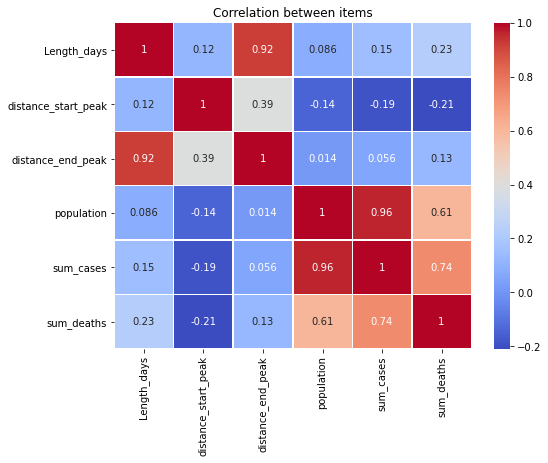

In [59]:
import seaborn as sns
from pylab import savefig
fig, ax = plt.subplots(figsize=(8,6))  
ax.set_title('Correlation between items')
correlation=ds[['Length_days','distance_start_peak', 'distance_end_peak','population','sum_cases','sum_deaths']].corr()
sns.color_palette("coolwarm")
svm=sns.heatmap(correlation,annot=True,cmap='coolwarm', linewidths=.5, ax=ax)
figure = svm.get_figure()    
figure.savefig('svm_conf2.png',bbox_inches='tight')